Capstone Final

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
#metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,confusion_matrix

#warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing the data

dataset = pd.read_excel("data.xlsx")
dataset

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,561031,57759,76350,77.28,5,22289,51,3326,1981-11-10,Self employed,...,0,0,0,0,0,0,2yrs 4mon,2yrs 4mon,0,0
233150,649600,55009,71200,78.72,138,17408,51,3385,1992-10-15,Self employed,...,0,0,15209,0,0,0,1yrs 5mon,1yrs 5mon,1,0
233151,603445,58513,68000,88.24,135,23313,45,1797,1981-12-19,Self employed,...,0,0,257948,0,35,5,0yrs 9mon,3yrs 10mon,1,0
233152,442948,22824,40458,61.79,160,16212,48,96,1989-07-31,Self employed,...,0,0,26046,0,9,1,1yrs 2mon,3yrs 2mon,0,0


In [4]:
# Checking the data types

dataset.dtypes

UniqueID                                        int64
disbursed_amount                                int64
asset_cost                                      int64
ltv                                           float64
branch_id                                       int64
supplier_id                                     int64
manufacturer_id                                 int64
Current_pincode_ID                              int64
Date.of.Birth                          datetime64[ns]
Employment.Type                                object
DisbursalDate                          datetime64[ns]
State_ID                                        int64
Employee_code_ID                                int64
MobileNo_Avl_Flag                               int64
Aadhar_flag                                     int64
PAN_flag                                        int64
VoterID_flag                                    int64
Driving_flag                                    int64
Passport_flag               

In [5]:
# Checking the shape of data

dataset.shape

(233154, 41)

In [6]:
# Checking missing values

dataset.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

We can see that there are more than 7000 missing values in the Employment type column.

In [7]:
# Removing unnecessary columns

dataset=dataset.drop(['UniqueID','Current_pincode_ID','Employee_code_ID', 'MobileNo_Avl_Flag'],axis=1)
dataset

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,50578,58400,89.55,67,22807,45,1984-01-01,Salaried,2018-08-03,6,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,53278,61360,89.63,67,22807,45,1985-08-24,Self employed,2018-08-01,6,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,52378,60300,88.39,67,22807,45,1977-12-09,Self employed,2018-09-26,6,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,46349,61500,76.42,67,22807,45,1988-06-01,Salaried,2018-09-23,6,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,43594,78256,57.50,67,22744,86,1994-07-14,Self employed,2018-10-08,6,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,57759,76350,77.28,5,22289,51,1981-11-10,Self employed,2018-10-06,9,...,0,0,0,0,0,0,2yrs 4mon,2yrs 4mon,0,0
233150,55009,71200,78.72,138,17408,51,1992-10-15,Self employed,2018-10-31,9,...,0,0,15209,0,0,0,1yrs 5mon,1yrs 5mon,1,0
233151,58513,68000,88.24,135,23313,45,1981-12-19,Self employed,2018-10-23,4,...,0,0,257948,0,35,5,0yrs 9mon,3yrs 10mon,1,0
233152,22824,40458,61.79,160,16212,48,1989-07-31,Self employed,2018-08-17,16,...,0,0,26046,0,9,1,1yrs 2mon,3yrs 2mon,0,0


In [8]:
# As there is no column for Age, so calculating age for every single row and adding Age column to the dataset

now = pd.to_datetime(dataset['DisbursalDate'], format='%Y-%m-%d')
dataset['Age'] = pd.to_datetime(dataset['Date.of.Birth'], format='%Y-%m-%d')
dataset['Age']  = dataset['Date.of.Birth'] .where(dataset['Date.of.Birth']  < now, dataset['Date.of.Birth']  -  np.timedelta64(100, 'Y'))   
dataset['Age']  = (now - dataset['Date.of.Birth'] ).astype('<m8[Y]') 
dataset=dataset.drop(['DisbursalDate','Date.of.Birth'],axis=1)
dataset

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Employment.Type,State_ID,Aadhar_flag,PAN_flag,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age
0,50578,58400,89.55,67,22807,45,Salaried,6,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34.0
1,53278,61360,89.63,67,22807,45,Self employed,6,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,32.0
2,52378,60300,88.39,67,22807,45,Self employed,6,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,40.0
3,46349,61500,76.42,67,22807,45,Salaried,6,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,30.0
4,43594,78256,57.50,67,22744,86,Self employed,6,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,57759,76350,77.28,5,22289,51,Self employed,9,1,0,...,0,0,0,0,0,2yrs 4mon,2yrs 4mon,0,0,36.0
233150,55009,71200,78.72,138,17408,51,Self employed,9,1,0,...,0,15209,0,0,0,1yrs 5mon,1yrs 5mon,1,0,26.0
233151,58513,68000,88.24,135,23313,45,Self employed,4,1,0,...,0,257948,0,35,5,0yrs 9mon,3yrs 10mon,1,0,36.0
233152,22824,40458,61.79,160,16212,48,Self employed,16,1,1,...,0,26046,0,9,1,1yrs 2mon,3yrs 2mon,0,0,29.0


In [9]:
# Checking the types of data for entire dataset

dataset.dtypes

disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Employment.Type                         object
State_ID                                 int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.ACCTS                         int64
PRI.OVERDUE.ACCTS                        int64
PRI.CURRENT.BALANCE                      int64
PRI.SANCTIONED.AMOUNT                    int64
PRI.DISBURSED.AMOUNT                     int64
SEC.NO.OF.ACC

We can see that there are 4 columns which contains categorical data and rest contains numerical data.

In [10]:
# To make changes in the dataset, creating a new dataset named df keeping the original untouched.

df = dataset.loc[:,:]
df

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Employment.Type,State_ID,Aadhar_flag,PAN_flag,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age
0,50578,58400,89.55,67,22807,45,Salaried,6,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34.0
1,53278,61360,89.63,67,22807,45,Self employed,6,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,32.0
2,52378,60300,88.39,67,22807,45,Self employed,6,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,40.0
3,46349,61500,76.42,67,22807,45,Salaried,6,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,30.0
4,43594,78256,57.50,67,22744,86,Self employed,6,1,0,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,57759,76350,77.28,5,22289,51,Self employed,9,1,0,...,0,0,0,0,0,2yrs 4mon,2yrs 4mon,0,0,36.0
233150,55009,71200,78.72,138,17408,51,Self employed,9,1,0,...,0,15209,0,0,0,1yrs 5mon,1yrs 5mon,1,0,26.0
233151,58513,68000,88.24,135,23313,45,Self employed,4,1,0,...,0,257948,0,35,5,0yrs 9mon,3yrs 10mon,1,0,36.0
233152,22824,40458,61.79,160,16212,48,Self employed,16,1,1,...,0,26046,0,9,1,1yrs 2mon,3yrs 2mon,0,0,29.0


In [11]:
# Changing the categorical columns of cns description and employment type to numerical data.

def credit_risk(df):
    d1=[]
    d2=[]
    for i in df:
        p = i.split("-")
        if len(p) == 1:
            d1.append(p[0])
            d2.append('unknown')
        else:
            d1.append(p[1])
            d2.append(p[0])

    return d2

sub_risk = {'unknown':-1, 'A':13, 'B':12, 'C':11,'D':10,'E':9,'F':8,'G':7,'H':6,'I':5,'J':4,'K':3, 'L':2,'M':1}
employment_map = {'Self employed':0, 'Salaried':1,np.nan:2}

df.loc[:,'credit_risk_grade']  = credit_risk(df["PERFORM_CNS.SCORE.DESCRIPTION"])
df.loc[:,'Credit Risk'] = df['credit_risk_grade'].apply(lambda x: sub_risk[x])

df.loc[:,'Employment Type'] = df['Employment.Type'].apply(lambda x: employment_map[x])

df=df.drop(['PERFORM_CNS.SCORE.DESCRIPTION','credit_risk_grade','Employment.Type'],axis=1)

In [12]:
df

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,...,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age,Credit Risk,Employment Type
0,50578,58400,89.55,67,22807,45,6,1,0,0,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34.0,-1,1
1,53278,61360,89.63,67,22807,45,6,1,0,0,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,32.0,-1,0
2,52378,60300,88.39,67,22807,45,6,1,0,0,...,0,0,0,0yrs 0mon,0yrs 0mon,1,1,40.0,-1,0
3,46349,61500,76.42,67,22807,45,6,1,0,0,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,30.0,-1,1
4,43594,78256,57.50,67,22744,86,6,1,0,0,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,24.0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,57759,76350,77.28,5,22289,51,9,1,0,0,...,0,0,0,2yrs 4mon,2yrs 4mon,0,0,36.0,-1,0
233150,55009,71200,78.72,138,17408,51,9,1,0,0,...,0,0,0,1yrs 5mon,1yrs 5mon,1,0,26.0,-1,0
233151,58513,68000,88.24,135,23313,45,4,1,0,0,...,0,35,5,0yrs 9mon,3yrs 10mon,1,0,36.0,-1,0
233152,22824,40458,61.79,160,16212,48,16,1,1,0,...,0,9,1,1yrs 2mon,3yrs 2mon,0,0,29.0,-1,0


In [13]:
# Changing the the format of AVERAGE.ACCT.AGE and storing the changed data in the CREDIT HISTORY LENGTH column.

def duration(dur):
    yrs = int(dur.split(' ')[0].replace('yrs',''))
    mon = int(dur.split(' ')[1].replace('mon',''))
    return yrs*12+mon
df['AVERAGE ACCT AGE'] = df['AVERAGE.ACCT.AGE'].apply(duration)
df['CREDIT HISTORY LENGTH'] = df['CREDIT.HISTORY.LENGTH'].apply(duration)
df.drop(['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'],axis=1,inplace=True)    

In [14]:
df

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,...,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,Age,Credit Risk,Employment Type,AVERAGE ACCT AGE,CREDIT HISTORY LENGTH
0,50578,58400,89.55,67,22807,45,6,1,0,0,...,0,0,0,0,0,34.0,-1,1,0,0
1,53278,61360,89.63,67,22807,45,6,1,0,0,...,0,0,0,0,0,32.0,-1,0,0,0
2,52378,60300,88.39,67,22807,45,6,1,0,0,...,0,0,0,1,1,40.0,-1,0,0,0
3,46349,61500,76.42,67,22807,45,6,1,0,0,...,0,0,0,0,0,30.0,-1,1,0,0
4,43594,78256,57.50,67,22744,86,6,1,0,0,...,0,0,0,0,0,24.0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,57759,76350,77.28,5,22289,51,9,1,0,0,...,0,0,0,0,0,36.0,-1,0,28,28
233150,55009,71200,78.72,138,17408,51,9,1,0,0,...,0,0,0,1,0,26.0,-1,0,17,17
233151,58513,68000,88.24,135,23313,45,4,1,0,0,...,0,35,5,1,0,36.0,-1,0,9,46
233152,22824,40458,61.79,160,16212,48,16,1,1,0,...,0,9,1,0,0,29.0,-1,0,14,38


In [15]:
# Checking the data types of dataset once again.

df.dtypes

disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
State_ID                                 int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.ACCTS                         int64
PRI.OVERDUE.ACCTS                        int64
PRI.CURRENT.BALANCE                      int64
PRI.SANCTIONED.AMOUNT                    int64
PRI.DISBURSED.AMOUNT                     int64
SEC.NO.OF.ACCTS                          int64
SEC.ACTIVE.ACCTS                         int64
SEC.OVERDUE.A

Now we can see that all the categorical and date type data columns are converted to numerical data.

In [16]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'State_ID', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'loan_default', 'Age', 'Credit Risk', 'Employment Type',
       'AVERAGE ACCT AGE', 'CREDIT HISTORY LENGTH'],
      dtype='object')

In [17]:
numerical = ['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'State_ID', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'loan_default', 'Age', 'Credit Risk', 'Employment Type',
       'AVERAGE ACCT AGE', 'CREDIT HISTORY LENGTH']

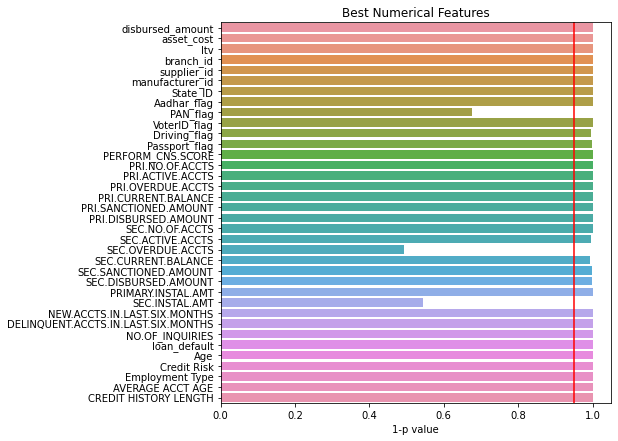

In [18]:
# Checking the best numerical features for statistical description.

p=[]
from scipy.stats import ttest_ind

for i in numerical:
    df1=df.groupby('loan_default').get_group(0)
    df2=df.groupby('loan_default').get_group(1)
    t,pvalue=ttest_ind(df1[i],df2[i])
    p.append(1-pvalue)
plt.figure(figsize=(7,7))
sns.barplot(x=p, y=numerical)
plt.title('Best Numerical Features')
plt.axvline(x=(1-0.05),color='r')
plt.xlabel('1-p value')
plt.show()

For visual purpose, I redid the graph to show acceptance of 'Alternative Hypothesis' for T Test. So, the ones crossing the red lines show statistical significance. But for vehicle loans, it is observed that Banks don't want to compromise of loosing any details of Secondary Account holder, since them also being the guarantor for the loan in case of a default. But, there is a problem in this T Test, as will be observed in the next cell.

In [19]:
# Checking the std for both non defaulter and defaulter.

for i in numerical:
    df1=df.groupby('loan_default').get_group(0)
    df2=df.groupby('loan_default').get_group(1)
    print(np.std(df1[i],ddof=1),np.std(df2[i],ddof=1))

13140.69900745498 12150.255527172329
19015.00286740077 18680.502608619492
11.681454560472606 10.327771446422984
69.19373228619486 71.95904442636376
3501.2841880007772 3452.0226244548157
22.098118672222732 22.26481234618758
4.4544752732629895 4.557573926972894
0.35868948990690974 0.3912064447251367
0.26386240338364797 0.26596454736347763
0.34367244564383803 0.3792777165782852
0.1521257734902845 0.14529699226651246
0.04802553864677291 0.03821025717987343
342.8837936951082 318.8262417092352
5.261141650236005 5.0401336264416505
2.0082420121201543 1.669965727209429
0.5320262425886055 0.6034839757822386
994631.7352945458 720451.2837834031
1234346.7457205276 4525738.059420681
1240214.8264123853 4527095.229863032
0.6516570890275873 0.527358347626265
0.32337474128357524 0.28809588122641655
0.11124913670239991 0.11046343401346004
184110.75765814638 106044.42506899122
195212.28973392927 130717.86808523617
194597.5394559965 130392.76612443924
157963.98513600943 124665.51133351552
16588.05255350806

The above observations are Standard Deviations of Columns (i.e., Defaulters vs Non-defaulters). T Test for independence runs on the assumption that samples under observations should have equal Standard Deviations. Although the difference observed above seems less, it still doesn't seem acceptable. Hence, we'll go with a non-parametric test.

We'll use SelectKBest library to narrow down choices of features. This will make use of Annova test.

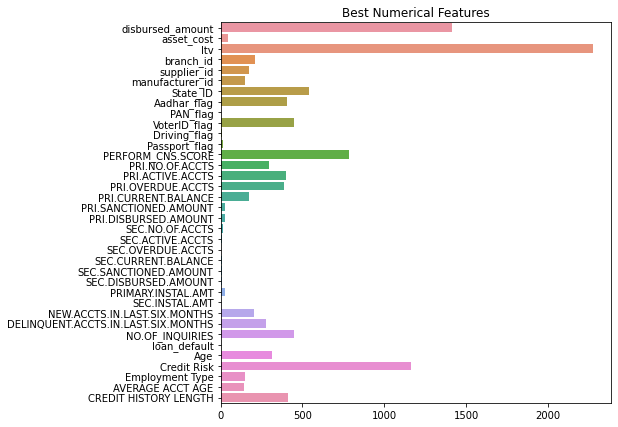

In [20]:
# We'll use SelectKBest library to narrow down choices of features. This will make use of Annova test.

from sklearn.feature_selection import SelectKBest,f_classif
n = SelectKBest(score_func=f_classif, k=10)
numcols=n.fit(df[numerical],df['loan_default'])
plt.figure(figsize=(7,7))
sns.barplot(x=numcols.scores_,y=numerical)
plt.title('Best Numerical Features')
plt.show()

The graph shows that Secondary Account informations are insignificant. Again of course, banks can't afford to drop Secondary Account informations, so we'll have to combine the Primary and Secondary Account informations.

In [21]:
# Now combining both Primary and Secondary data for better analysis results.

df.loc[:,'No of Accounts'] = df['PRI.NO.OF.ACCTS'] + df['SEC.NO.OF.ACCTS']
df.loc[:,'PRI Inactive accounts'] = df['PRI.NO.OF.ACCTS'] - df['PRI.ACTIVE.ACCTS']
df.loc[:,'SEC Inactive accounts'] = df['SEC.NO.OF.ACCTS'] - df['SEC.ACTIVE.ACCTS']
df.loc[:,'Total Inactive accounts'] = df['PRI Inactive accounts'] + df['SEC Inactive accounts']
df.loc[:,'Total Overdue Accounts'] = df['PRI.OVERDUE.ACCTS'] + df['SEC.OVERDUE.ACCTS']
df.loc[:,'Total Current Balance'] = df['PRI.CURRENT.BALANCE'] + df['SEC.CURRENT.BALANCE']
df.loc[:,'Total Sanctioned Amount'] = df['PRI.SANCTIONED.AMOUNT'] + df['SEC.SANCTIONED.AMOUNT']
df.loc[:,'Total Disbursed Amount'] = df['PRI.DISBURSED.AMOUNT'] + df['SEC.DISBURSED.AMOUNT']
df.loc[:,'Total Installment'] = df['PRIMARY.INSTAL.AMT'] + df['SEC.INSTAL.AMT']

In [22]:
# Droping all unnecessary columns.

df=df.drop(['PRI.NO.OF.ACCTS','SEC.NO.OF.ACCTS','PRI.CURRENT.BALANCE','PRI Inactive accounts','SEC Inactive accounts',
            'PRI.SANCTIONED.AMOUNT','SEC.NO.OF.ACCTS','PRI.NO.OF.ACCTS','PRI.DISBURSED.AMOUNT','PRI.ACTIVE.ACCTS', 
            'PRI.OVERDUE.ACCTS','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT', 'SEC.OVERDUE.ACCTS',
            'SEC.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT','disbursed_amount','SEC.ACTIVE.ACCTS'],axis=1)

In [23]:
df

,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,...,Employment Type,AVERAGE ACCT AGE,CREDIT HISTORY LENGTH,No of Accounts,Total Inactive accounts,Total Overdue Accounts,Total Current Balance,Total Sanctioned Amount,Total Disbursed Amount,Total Installment
0,58400,89.55,67,22807,45,6,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,61360,89.63,67,22807,45,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60300,88.39,67,22807,45,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,61500,76.42,67,22807,45,6,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,78256,57.50,67,22744,86,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,76350,77.28,5,22289,51,9,1,0,0,0,...,0,28,28,1,1,0,0,0,0,0
233150,71200,78.72,138,17408,51,9,1,0,0,0,...,0,17,17,1,0,1,0,464727,464727,15209
233151,68000,88.24,135,23313,45,4,1,0,0,0,...,0,9,46,68,3,1,96524920,105865712,105755712,257948
233152,40458,61.79,160,16212,48,16,1,1,0,0,...,0,14,38,72,20,1,23286804,33280996,33280996,26046


In [24]:
# Checking columns of dataset

df.columns

Index(['asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id',
       'State_ID', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'loan_default', 'Age', 'Credit Risk', 'Employment Type',
       'AVERAGE ACCT AGE', 'CREDIT HISTORY LENGTH', 'No of Accounts',
       'Total Inactive accounts', 'Total Overdue Accounts',
       'Total Current Balance', 'Total Sanctioned Amount',
       'Total Disbursed Amount', 'Total Installment'],
      dtype='object')

In [25]:
# Changing the names of columns for better use of those columns.

df.loc[:,'Asset Cost'] = df['asset_cost']
df.loc[:,'Branch ID'] = df['branch_id']
df.loc[:,'State ID'] = df['State_ID']
df.loc[:,'Supplier ID'] = df['supplier_id']
df.loc[:,'Manufacturer ID'] = df['manufacturer_id']
df.loc[:,'Aadhar'] = df['Aadhar_flag']
df.loc[:,'Pan'] = df['PAN_flag']
df.loc[:,'Voter'] = df['VoterID_flag']
df.loc[:,'Driving'] = df['Driving_flag']
df.loc[:,'Passport'] = df['Passport_flag']
df.loc[:,'Credit Score'] = df['PERFORM_CNS.SCORE']
df.loc[:,'New Accnt in last 6 months'] = df['NEW.ACCTS.IN.LAST.SIX.MONTHS']
df.loc[:,'Loans defaulted in last 6 months'] = df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']
df.loc[:,'No of Inquiries'] = df['NO.OF_INQUIRIES']
df.loc[:,'Loan Default'] = df['loan_default']

In [26]:
df

,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,...,Aadhar,Pan,Voter,Driving,Passport,Credit Score,New Accnt in last 6 months,Loans defaulted in last 6 months,No of Inquiries,Loan Default
0,58400,89.55,67,22807,45,6,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,61360,89.63,67,22807,45,6,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,60300,88.39,67,22807,45,6,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3,61500,76.42,67,22807,45,6,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,78256,57.50,67,22744,86,6,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,76350,77.28,5,22289,51,9,1,0,0,0,...,1,0,0,0,0,14,0,0,0,0
233150,71200,78.72,138,17408,51,9,1,0,0,0,...,1,0,0,0,0,14,0,0,1,0
233151,68000,88.24,135,23313,45,4,1,0,0,0,...,1,0,0,0,0,11,35,5,1,0
233152,40458,61.79,160,16212,48,16,1,1,0,0,...,1,1,0,0,0,11,9,1,0,0


In [27]:
# Droping the unnecesaary columns.

df=df.drop(['asset_cost', 'branch_id', 'supplier_id', 'manufacturer_id',
       'State_ID', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'loan_default'], axis = 1)

In [28]:
# The final dataset after all the changes.

df

,ltv,Age,Credit Risk,Employment Type,AVERAGE ACCT AGE,CREDIT HISTORY LENGTH,No of Accounts,Total Inactive accounts,Total Overdue Accounts,Total Current Balance,...,Aadhar,Pan,Voter,Driving,Passport,Credit Score,New Accnt in last 6 months,Loans defaulted in last 6 months,No of Inquiries,Loan Default
0,89.55,34.0,-1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,89.63,32.0,-1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,88.39,40.0,-1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3,76.42,30.0,-1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,57.50,24.0,-1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,77.28,36.0,-1,0,28,28,1,1,0,0,...,1,0,0,0,0,14,0,0,0,0
233150,78.72,26.0,-1,0,17,17,1,0,1,0,...,1,0,0,0,0,14,0,0,1,0
233151,88.24,36.0,-1,0,9,46,68,3,1,96524920,...,1,0,0,0,0,11,35,5,1,0
233152,61.79,29.0,-1,0,14,38,72,20,1,23286804,...,1,1,0,0,0,11,9,1,0,0


In [29]:
# Now checking the columns of dataset after applying multiple chamges in the data. This is the Final data which we are going to use for our analysis.

df.columns

Index(['ltv', 'Age', 'Credit Risk', 'Employment Type', 'AVERAGE ACCT AGE',
       'CREDIT HISTORY LENGTH', 'No of Accounts', 'Total Inactive accounts',
       'Total Overdue Accounts', 'Total Current Balance',
       'Total Sanctioned Amount', 'Total Disbursed Amount',
       'Total Installment', 'Asset Cost', 'Branch ID', 'State ID',
       'Supplier ID', 'Manufacturer ID', 'Aadhar', 'Pan', 'Voter', 'Driving',
       'Passport', 'Credit Score', 'New Accnt in last 6 months',
       'Loans defaulted in last 6 months', 'No of Inquiries', 'Loan Default'],
      dtype='object')

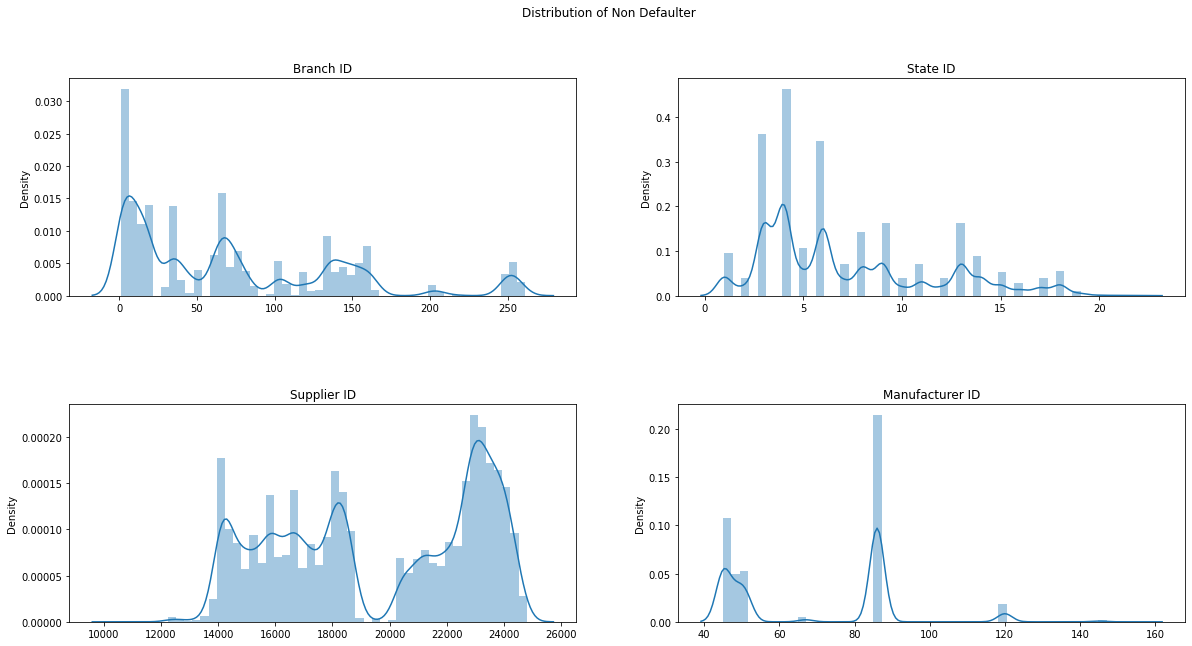

In [30]:
# Checking the distribution of data of non defaulter for Branch ID, State ID, Supplier ID, Manufacturer ID.

df1=df.groupby('Loan Default').get_group(0) 

data=df1[['Branch ID', 'State ID','Supplier ID', 'Manufacturer ID']]
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distribution of Non Defaulter')

for ax, feature, name in zip(axes.flatten(), data.values.T, data.columns):
    sns.distplot(feature, ax=ax)
    ax.set(title=str(name))
plt.show()

From the above graphs, we can tell that data is widely distributed for all catgories despite we can see some high numbers for some IDs. That menas there are outliers in all the categories for non defaulter.

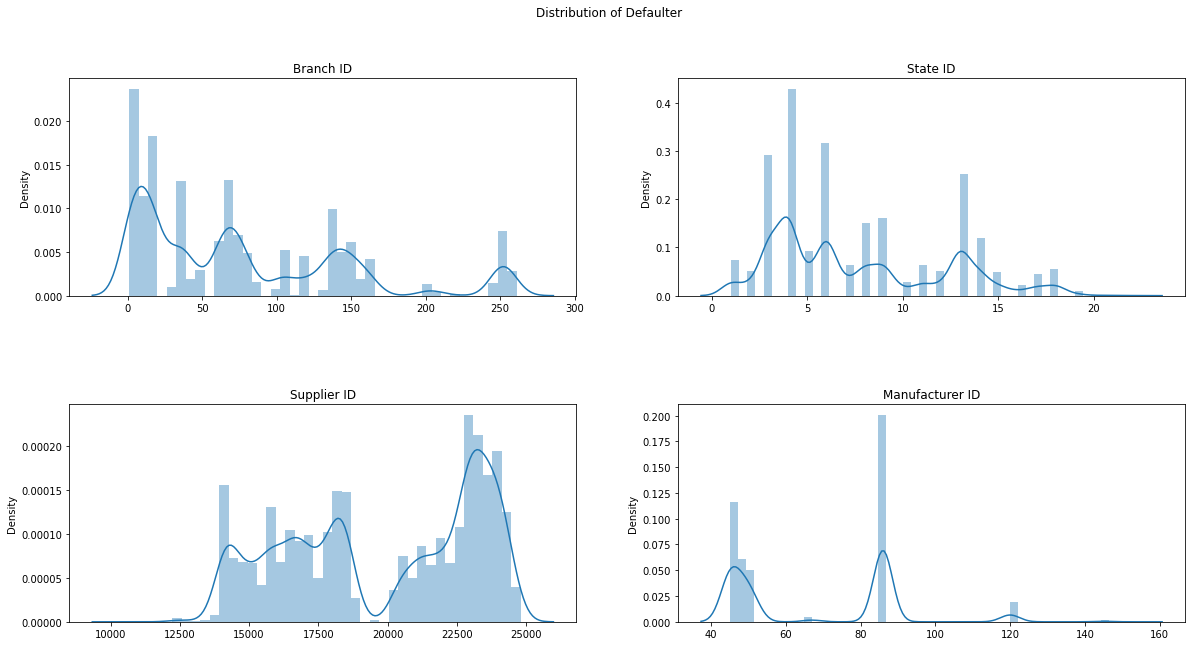

In [31]:
# Checking the distribution of data of defaulter for Branch ID, State ID, Supplier ID, Manufacturer ID.

df2=df.groupby('Loan Default').get_group(1) 

data=df2[['Branch ID', 'State ID','Supplier ID', 'Manufacturer ID']]
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distribution of Defaulter')

for ax, feature, name in zip(axes.flatten(), data.values.T, data.columns):
    sns.distplot(feature, ax=ax)
    ax.set(title=str(name))
plt.show()

From the above graphs, we can say that defaulters distribution for all the categories are kind of similar to the non defaulters distribution despite of so many outliers. Also the nos are less compare to non defaulters.

Distribution OF Loan Default Across Various Employment Type

In [32]:
# For Non Defaulter.

df1=df.groupby('Loan Default').get_group(0) 
d1 = df1[['Employment Type','Loan Default']].groupby('Employment Type').count().reset_index()
d1.rename(columns= {'Loan Default':'Non Defaulter'}, inplace = True)
d1

,Employment Type,Non Defaulter
0,0,98578
1,1,77948
2,2,6017


In [33]:
# For Defaulter.

df2=df.groupby('Loan Default').get_group(1) 
d2 = df2[['Employment Type','Loan Default']].groupby('Employment Type').count().reset_index()
d2.rename(columns= {'Loan Default':'Defaulter'}, inplace = True)
d2

,Employment Type,Defaulter
0,0,29057
1,1,19910
2,2,1644


In [34]:
# Merging both the data of Non Defaulter and Defaulter.

d = pd.merge(d1,d2, on = "Employment Type")
d = d.reset_index().drop('index', axis =1)
d 

,Employment Type,Non Defaulter,Defaulter
0,0,98578,29057
1,1,77948,19910
2,2,6017,1644


Pie Chart of Distribution

In [35]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

In [36]:
labels = ['Self employed','Salaried','Unknown']
size1 = [98578,77948,6017]
size2 = [29057,19910,1644]


fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Non Defaulter', 'Defaulter'])
fig.add_trace(go.Pie(labels=labels, values=size1,pull = [0.1,0.1,0.1], scalegroup='one',
                     name="Non Defaulter"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=size2,pull = [0.1,0.1,0.1], scalegroup='two',
                     name="Defaulter"), 1, 2)

fig.update_layout(title_text='Distribution of Non defaulter vs Defaulter Across Various Employment Group')
fig.show()

From the above chart, we can clearly say that defaulter percentage is more in self employed group whereas non defaulter percentage is more in salaried group. For unknown both the percentage is more or less same.

Loan Default Distribution Across Various Age Group

In [37]:
# For Non Defaulter

df1=df.groupby('Loan Default').get_group(0) 
df1_age = df1[['Age','Loan Default']].groupby('Age').count().reset_index()
df1_age.rename(columns= {'Loan Default':'Non Defaulter'}, inplace = True)
df1_age

,Age,Non Defaulter
0,18.0,691
1,19.0,1336
2,20.0,1651
3,21.0,6701
4,22.0,7811
5,23.0,8006
6,24.0,7980
7,25.0,7795
8,26.0,7739
9,27.0,7400


In [38]:
# For Defaulter

df2=df.groupby('Loan Default').get_group(1) 
df2_age = df2[['Age','Loan Default']].groupby('Age').count().reset_index()
df2_age.rename(columns= {'Loan Default':'Defaulter'}, inplace = True)
df2_age

,Age,Defaulter
0,18.0,230
1,19.0,409
2,20.0,561
3,21.0,2260
4,22.0,2514
5,23.0,2480
6,24.0,2394
7,25.0,2318
8,26.0,2360
9,27.0,2092


Bar Chart for Comparison.

In [39]:
x1 = df1_age['Age']
x2 = df2_age['Age']
y1 = df1_age['Non Defaulter']
y2 = df2_age['Defaulter']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=x1,
    y=y1,
    name='Non Defaulter',
    marker_color='blue'
))
fig.add_trace(go.Bar(
    x=x2,
    y=y2,
    name='Defaulter',
    marker_color='red'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title_text='Distribution of Non defaulter vs Defaulter Across Various Age Group',barmode='group', xaxis_tickangle=-45)
fig.show()

From the above graph, we can clearly say that between age group of 20-30 both defaulter and non defaulter distribution is high, between 30-40, distribution is medium and from 40 to above distribution is discreasing to lower values.

In [40]:
df.columns

Index(['ltv', 'Age', 'Credit Risk', 'Employment Type', 'AVERAGE ACCT AGE',
       'CREDIT HISTORY LENGTH', 'No of Accounts', 'Total Inactive accounts',
       'Total Overdue Accounts', 'Total Current Balance',
       'Total Sanctioned Amount', 'Total Disbursed Amount',
       'Total Installment', 'Asset Cost', 'Branch ID', 'State ID',
       'Supplier ID', 'Manufacturer ID', 'Aadhar', 'Pan', 'Voter', 'Driving',
       'Passport', 'Credit Score', 'New Accnt in last 6 months',
       'Loans defaulted in last 6 months', 'No of Inquiries', 'Loan Default'],
      dtype='object')

In [41]:
df

,ltv,Age,Credit Risk,Employment Type,AVERAGE ACCT AGE,CREDIT HISTORY LENGTH,No of Accounts,Total Inactive accounts,Total Overdue Accounts,Total Current Balance,...,Aadhar,Pan,Voter,Driving,Passport,Credit Score,New Accnt in last 6 months,Loans defaulted in last 6 months,No of Inquiries,Loan Default
0,89.55,34.0,-1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,89.63,32.0,-1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,88.39,40.0,-1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3,76.42,30.0,-1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,57.50,24.0,-1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,77.28,36.0,-1,0,28,28,1,1,0,0,...,1,0,0,0,0,14,0,0,0,0
233150,78.72,26.0,-1,0,17,17,1,0,1,0,...,1,0,0,0,0,14,0,0,1,0
233151,88.24,36.0,-1,0,9,46,68,3,1,96524920,...,1,0,0,0,0,11,35,5,1,0
233152,61.79,29.0,-1,0,14,38,72,20,1,23286804,...,1,1,0,0,0,11,9,1,0,0


Checking for most of ID proof used by customer for loan.

In [42]:
# For Aadhar

df[['Aadhar']].query('Aadhar == 1').count()

Aadhar    195924
dtype: int64

In [43]:
# For Pan

df[['Pan']].query('Pan == 1').count()

Pan    17621
dtype: int64

In [44]:
# For Voter

df[['Voter']].query('Voter == 1').count()

Voter    33794
dtype: int64

In [45]:
# For Driving

df[['Driving']].query('Driving == 1').count()

Driving    5419
dtype: int64

In [46]:
# For Passport

df[['Passport']].query('Passport == 1').count()

Passport    496
dtype: int64

From the above collected data for diffrent ID proofs, we can tell that most of the customer provided Aadhar as their ID proof.

Credit Score

In [47]:
# Statistical description of Credit Score

df['Credit Score'].describe()

count    233154.000000
mean        289.462994
std         338.374779
min           0.000000
25%           0.000000
50%           0.000000
75%         678.000000
max         890.000000
Name: Credit Score, dtype: float64

In [48]:
# Dividing Credit Score on the basis of Non Default and Default.

cibil_non_default = df[df['Loan Default']==0]['Credit Score']
cibil_default = df[df['Loan Default']==1]['Credit Score']

In [49]:
pd.DataFrame([cibil_non_default.describe(), cibil_default.describe()], index=['non_defaulters','defaulters'])

,count,mean,std,min,25%,50%,75%,max
non_defaulters,182543.0,299.784270,342.883794,0.0,0.0,15.0,690.0,890.0
defaulters,50611.0,252.236372,318.826242,0.0,0.0,0.0,610.0,879.0


Here we can observe a difference in the mean and median cibil scores among the defaulters and non defaulters. The mean and median cibil scores are higher for non defaulters.

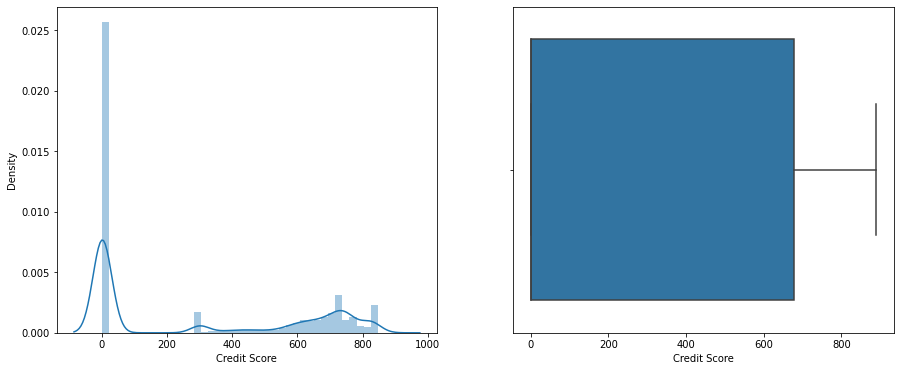

In [50]:
# plotting the graphs

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.distplot(df['Credit Score'])

plt.subplot(1,2,2)
sns.boxplot(df['Credit Score'])

plt.show()

From above graph, we can say that most of the people paying their loans on time as we can see lot of values at 0.

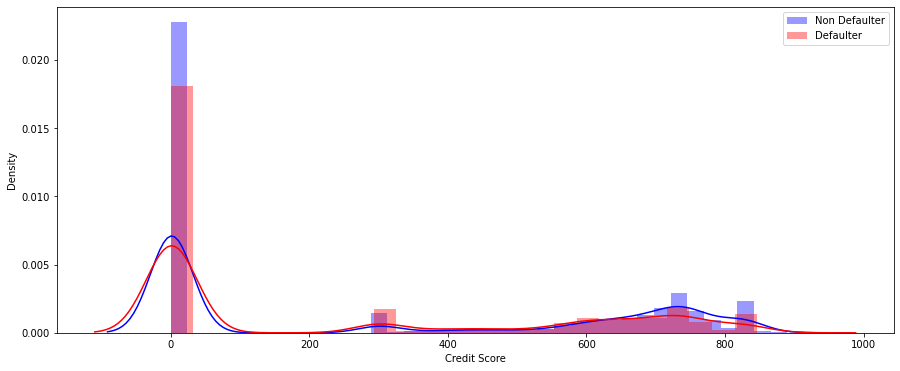

In [51]:
plt.figure(figsize=(15,6))

sns.distplot(cibil_non_default, color='blue', label = 'Non Defaulter')
sns.distplot(cibil_default, color='red', label = 'Defaulter')

plt.legend()
plt.show()

CIBIL score distribution is looking almost similar for defaulters and non defaulters


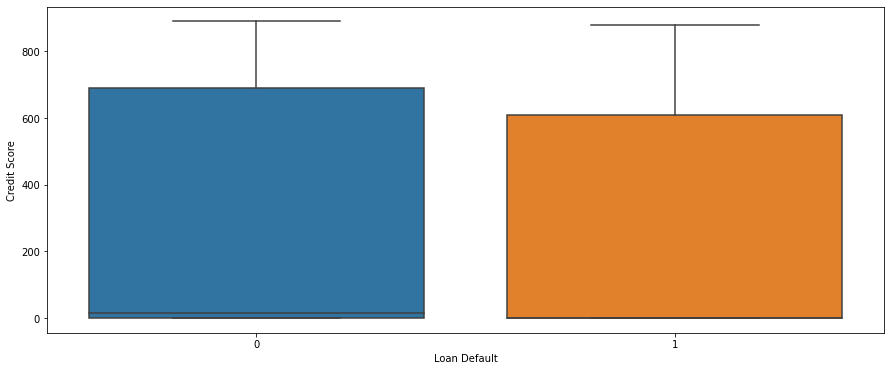

In [52]:
plt.figure(figsize=(15,6))
sns.boxplot(x ='Loan Default',y='Credit Score',data=df)
plt.show()

We can see that the mean and median cibil scores of non defaulters is sligtly higher than that of defaulters. Also the 75th percentile value of cibil score is higher for defaulters. The max score is nearly same for defaulters and non defaulters

Credit Score Description


In [53]:
dataset.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Employment.Type', 'State_ID', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default', 'Age',
       'credit_risk_grade', 'Credit Risk', 'Employment Type'],
      dtype='object')

In [54]:
# Statistical description of Credit Score Description.

dataset['PERFORM_CNS.SCORE.DESCRIPTION'].describe()

count                          233154
unique                             20
top       No Bureau History Available
freq                           116950
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: object

In [55]:
# Getting the counts of each description group.

dataset['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [56]:
# Getting the percentage of Defaulter for each group

cnsd = pd.crosstab(index=dataset['PERFORM_CNS.SCORE.DESCRIPTION'], columns=dataset['loan_default'])
cnsd['Percent of Defaulters'] = (cnsd[1] / (cnsd[0] + cnsd[1]))*100
cnsd

loan_default,0,1,Percent of Defaulters
PERFORM_CNS.SCORE.DESCRIPTION,,,
A-Very Low Risk,11783,2341,16.574625
B-Very Low Risk,7993,1208,13.129008
C-Very Low Risk,13275,2770,17.263945
D-Very Low Risk,9659,1699,14.958619
E-Low Risk,4821,1000,17.179179
F-Low Risk,6905,1580,18.621096
G-Low Risk,3202,786,19.709127
H-Medium Risk,5197,1658,24.186725
I-Medium Risk,4042,1515,27.262912


We can see that as the risk increases, the percent of default also increases

In [57]:
# Getting the min and man credit score for each group.

dataset.groupby(by='PERFORM_CNS.SCORE.DESCRIPTION')['PERFORM_CNS.SCORE'].agg([min,max]).sort_values(by='min')

,min,max
PERFORM_CNS.SCORE.DESCRIPTION,,
No Bureau History Available,0,0
Not Scored: More than 50 active Accounts found,11,11
Not Scored: Only a Guarantor,14,14
Not Scored: Sufficient History Not Available,15,15
Not Scored: No Activity seen on the customer (Inactive),16,16
Not Scored: Not Enough Info available on the customer,17,17
Not Scored: No Updates available in last 36 months,18,18
M-Very High Risk,300,300
L-Very High Risk,301,350


In [58]:
# Grouping the groups in 6 different groups

risk = []
for i in dataset['PERFORM_CNS.SCORE.DESCRIPTION']:
    if('Very Low' in i):
        risk.append('Very Low Risk')
    elif('Low' in i):
        risk.append('Low Risk')
    elif('Medium' in i):
        risk.append('Medium Risk')
    elif('Very High' in i):
        risk.append('Very High Risk')
    elif('High' in i):
        risk.append('High Risk')
    else:
        risk.append('Not Scored')

In [59]:
dataset['risk'] = risk

In [60]:
# Getting the counts of each 6 groups

risk_counts = pd.Series(risk).value_counts().sort_values()
risk_counts

Very High Risk      9910
High Risk          12025
Medium Risk        12412
Low Risk           18294
Very Low Risk      50728
Not Scored        129785
dtype: int64

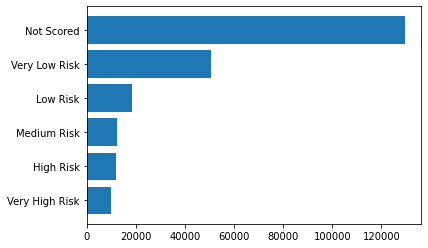

In [61]:
# Plotting the graph

plt.barh(y = risk_counts.index,width=risk_counts.values)
plt.show()

In [62]:
# Getting the percentage of deafult for each groups

risk_counts = pd.crosstab(index=dataset['risk'], columns=dataset['loan_default'])

risk_counts['Percent_of_default'] = round((risk_counts[1]/risk_counts.sum(axis=1))*100,2)

risk_counts.sort_values(by='Percent_of_default',ascending=False)

loan_default,0,1,Percent_of_default
risk,,,
Very High Risk,6919,2991,30.18
High Risk,8777,3248,27.01
Medium Risk,9239,3173,25.56
Not Scored,99970,29815,22.97
Low Risk,14928,3366,18.40
Very Low Risk,42710,8018,15.81


In [63]:
# Getting min and max credit score for each groups

dataset.groupby(by='risk')['PERFORM_CNS.SCORE'].agg([min,max]).sort_values(by='min')

,min,max
risk,,
Not Scored,0,18
Very High Risk,300,350
High Risk,351,570
Medium Risk,571,630
Low Risk,631,705
Very Low Risk,706,890


In [64]:
# Creating risk map for each group

risk_map = {'Not Scored':-1, 
            'Very Low Risk':4,
            'Low Risk':3,
            'Medium Risk':2, 
            'High Risk':1,
            'Very High Risk':0}

dataset['risk'] = dataset['risk'].map(risk_map)

In [65]:
# Getting percentage of default according to risk map

risk_counts = pd.crosstab(index=dataset['risk'], columns=dataset['loan_default'])
risk_counts['Percent of Defaluters'] = (risk_counts[1] / (risk_counts[0] + risk_counts[1]))*100
risk_counts.sort_values(by='Percent of Defaluters', ascending=False)

loan_default,0,1,Percent of Defaluters
risk,,,
0,6919,2991,30.181635
1,8777,3248,27.010395
2,9239,3173,25.563970
-1,99970,29815,22.972609
3,14928,3366,18.399475
4,42710,8018,15.805867


We can see that the percent of defaulters are less for low risk and very low risk categories.

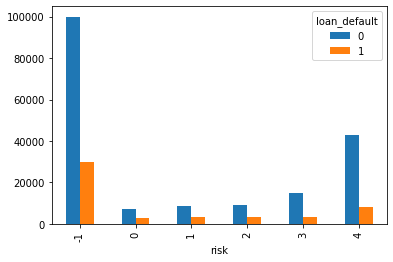

In [66]:
# Plotting the defaulte vs non default graph for each risk group 

pd.crosstab(index=dataset['risk'], columns=dataset['loan_default']).plot(kind='bar')
plt.show()

Primary and Secondary Account

In [67]:
df.columns

Index(['ltv', 'Age', 'Credit Risk', 'Employment Type', 'AVERAGE ACCT AGE',
       'CREDIT HISTORY LENGTH', 'No of Accounts', 'Total Inactive accounts',
       'Total Overdue Accounts', 'Total Current Balance',
       'Total Sanctioned Amount', 'Total Disbursed Amount',
       'Total Installment', 'Asset Cost', 'Branch ID', 'State ID',
       'Supplier ID', 'Manufacturer ID', 'Aadhar', 'Pan', 'Voter', 'Driving',
       'Passport', 'Credit Score', 'New Accnt in last 6 months',
       'Loans defaulted in last 6 months', 'No of Inquiries', 'Loan Default'],
      dtype='object')

In [68]:
df.loc[:,'Total Active Accounts'] = df['No of Accounts'] + df['Total Inactive accounts']

In [69]:
df.columns

Index(['ltv', 'Age', 'Credit Risk', 'Employment Type', 'AVERAGE ACCT AGE',
       'CREDIT HISTORY LENGTH', 'No of Accounts', 'Total Inactive accounts',
       'Total Overdue Accounts', 'Total Current Balance',
       'Total Sanctioned Amount', 'Total Disbursed Amount',
       'Total Installment', 'Asset Cost', 'Branch ID', 'State ID',
       'Supplier ID', 'Manufacturer ID', 'Aadhar', 'Pan', 'Voter', 'Driving',
       'Passport', 'Credit Score', 'New Accnt in last 6 months',
       'Loans defaulted in last 6 months', 'No of Inquiries', 'Loan Default',
       'Total Active Accounts'],
      dtype='object')

In [70]:
df[['No of Accounts','Total Active Accounts','Total Overdue Accounts','Total Current Balance','Total Sanctioned Amount','Total Disbursed Amount','Total Installment']].describe()

,No of Accounts,Total Active Accounts,Total Overdue Accounts,Total Current Balance,Total Sanctioned Amount,Total Disbursed Amount,Total Installment
count,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05
mean,2.499717,3.931835,0.163793,1.713279e+05,2.257998e+05,2.252459e+05,1.342875e+04
std,5.289753,9.168528,0.564429,9.607690e+05,2.384011e+06,2.386884e+06,1.523327e+05
min,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.000000,4.000000,0.000000,3.733600e+04,6.564975e+04,6.428400e+04,2.083000e+03
max,453.000000,904.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,2.564281e+07


Total no of Accounts

In [71]:
# Statistical description of No of Accounts

df['No of Accounts'].describe() 

count    233154.000000
mean          2.499717
std           5.289753
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max         453.000000
Name: No of Accounts, dtype: float64

In [72]:
na_non_default = df[df['Loan Default']==0]['No of Accounts']
na_default = df[df['Loan Default']==1]['No of Accounts']

In [73]:
pd.DataFrame([na_non_default.describe(), na_default.describe()], index=['non_defaulters','defaulters'])

,count,mean,std,min,25%,50%,75%,max
non_defaulters,182543.0,2.599886,5.338380,0.0,0.0,1.0,3.0,354.0
defaulters,50611.0,2.138428,5.094236,0.0,0.0,0.0,2.0,453.0


Active Accounts

In [74]:
# Getting the percentage data for Active Accounts

counts = df['Total Active Accounts'].value_counts()
percent = df['Total Active Accounts'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

,counts,percent_of_data
0,115792,49.663313
1,22669,9.722758
2,19378,8.311245
3,11496,4.930647
4,9642,4.135464
...,...,...
142,1,0.000429
173,1,0.000429
247,1,0.000429
102,1,0.000429


There are over 50 percent inactive accounts. Around 18 percent have 1 active account present

Overdue Accounts

In [75]:
# Getting the percentage data for Overdue Accounts

counts = df['Total Overdue Accounts'].value_counts()
percent = df['Total Overdue Accounts'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

,counts,percent_of_data
0,205911,88.315448
1,20556,8.816490
2,4510,1.934344
3,1301,0.558000
4,443,0.190003
5,180,0.077202
6,107,0.045892
7,42,0.018014
8,29,0.012438
9,27,0.011580


Most of the accounts are not overdue. Around 9 percent of data contain 1 overdue account, and around 2 percent of data contain 2 overdue accounts

In [76]:
no_inquiries = pd.crosstab(index=df['Total Overdue Accounts'], columns=df['Loan Default'])
no_inquiries['pct_default'] = (no_inquiries[1]/no_inquiries.sum(axis=1))*100
no_inquiries

Loan Default,0,1,pct_default
Total Overdue Accounts,,,
0,162687,43224,20.991593
1,15072,5484,26.678342
2,3232,1278,28.337029
3,914,387,29.746349
4,314,129,29.119639
5,125,55,30.555556
6,83,24,22.429907
7,35,7,16.666667
8,22,7,24.137931


Upto 5 overdue accounts, we can see that as the number of overdue accounts increase, the percentage of default also increase. However we do not observe the same pattern/any pattern beyond 5 overdue accounts

Current Balance

In [77]:
# Getting the percentage data for Current Balance

counts = df['Total Current Balance'].value_counts()
percent = df['Total Current Balance'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

,counts,percent_of_data
0,140434,60.232293
400,121,0.051897
800,121,0.051897
30000,101,0.043319
50000,82,0.035170
...,...,...
191742,1,0.000429
21059,1,0.000429
709936,1,0.000429
206858,1,0.000429


Around 60 percent of data do not have any current balance.

Sanctioned Amount

In [78]:
# Getting the percentage data for Sanctioned Amount

counts = df['Total Sanctioned Amount'].value_counts()
percent = df['Total Sanctioned Amount'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

,counts,percent_of_data
0,136818,58.681387
50000,1508,0.646783
30000,1448,0.621049
100000,977,0.419036
25000,949,0.407027
...,...,...
64499,1,0.000429
156629,1,0.000429
31835,1,0.000429
362087,1,0.000429


For around 58 percent of the accounts, no amount was sanctioned for all the loans at the time of disbursement

Disbursed Amount

In [79]:
# Getting the percentage data for Disbursed Amount

counts = df['Total Disbursed Amount'].value_counts()
percent = df['Total Disbursed Amount'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

,counts,percent_of_data
0,136922,58.725992
50000,1404,0.602177
30000,1342,0.575585
100000,948,0.406598
40000,795,0.340976
...,...,...
130024,1,0.000429
8296,1,0.000429
124773,1,0.000429
29606,1,0.000429


For 58 percent of all accounts, no amount was disbursed for all the loans at the time of disbursement

Installment

In [80]:
# Getting the percentage data for Installment

counts = df['Total Installment'].value_counts()
percent = df['Total Installment'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

,counts,percent_of_data
0,158556,68.004838
1620,292,0.125239
1500,157,0.067337
1600,145,0.062191
2000,140,0.060046
...,...,...
144062,1,0.000429
48280,1,0.000429
19203,1,0.000429
628116,1,0.000429


Around 68 percent of data do not have any installment amount to pay

Heat Map

In [81]:
# Dataframe for Heat Map

df3 = df[['Age', 'Credit Risk', 'No of Accounts','Total Inactive accounts', 'Total Overdue Accounts',
       'Total Current Balance', 'Total Sanctioned Amount',
       'Total Disbursed Amount', 'Total Installment',
       'Credit Score', 'New Accnt in last 6 months', 'Loans defaulted in last 6 months', 'No of Inquiries',
       'Loan Default','CREDIT HISTORY LENGTH']]

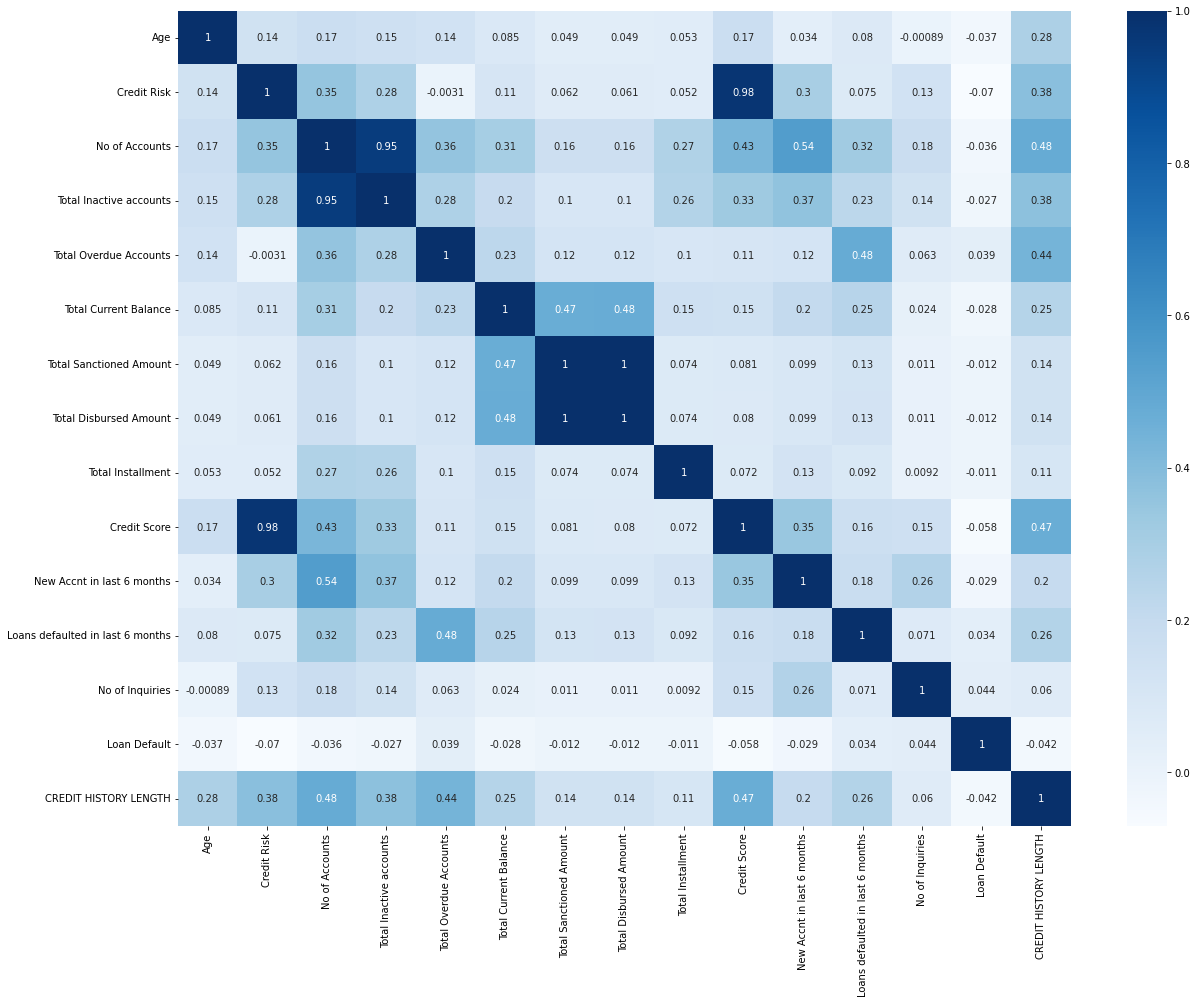

In [82]:
plt.figure(figsize=(20,15))
sns.heatmap(df3.corr(),annot=True,cmap='Blues')
plt.show()

From the above correlation heatmap, we can see that some of the features are highly correlated(>0.75) with each other.

--- Credit Score and Credit Risk - .98

--- Total Sanctioned Amount and Total Disbursed Amount - 1

--- Credit Risk and No of Inquiries - .13

--- No of Accounts and New accounts in last 6 months - .54 

Sanctioned Amount VS Disbursed Amount

In [83]:
df.columns

Index(['ltv', 'Age', 'Credit Risk', 'Employment Type', 'AVERAGE ACCT AGE',
       'CREDIT HISTORY LENGTH', 'No of Accounts', 'Total Inactive accounts',
       'Total Overdue Accounts', 'Total Current Balance',
       'Total Sanctioned Amount', 'Total Disbursed Amount',
       'Total Installment', 'Asset Cost', 'Branch ID', 'State ID',
       'Supplier ID', 'Manufacturer ID', 'Aadhar', 'Pan', 'Voter', 'Driving',
       'Passport', 'Credit Score', 'New Accnt in last 6 months',
       'Loans defaulted in last 6 months', 'No of Inquiries', 'Loan Default',
       'Total Active Accounts'],
      dtype='object')

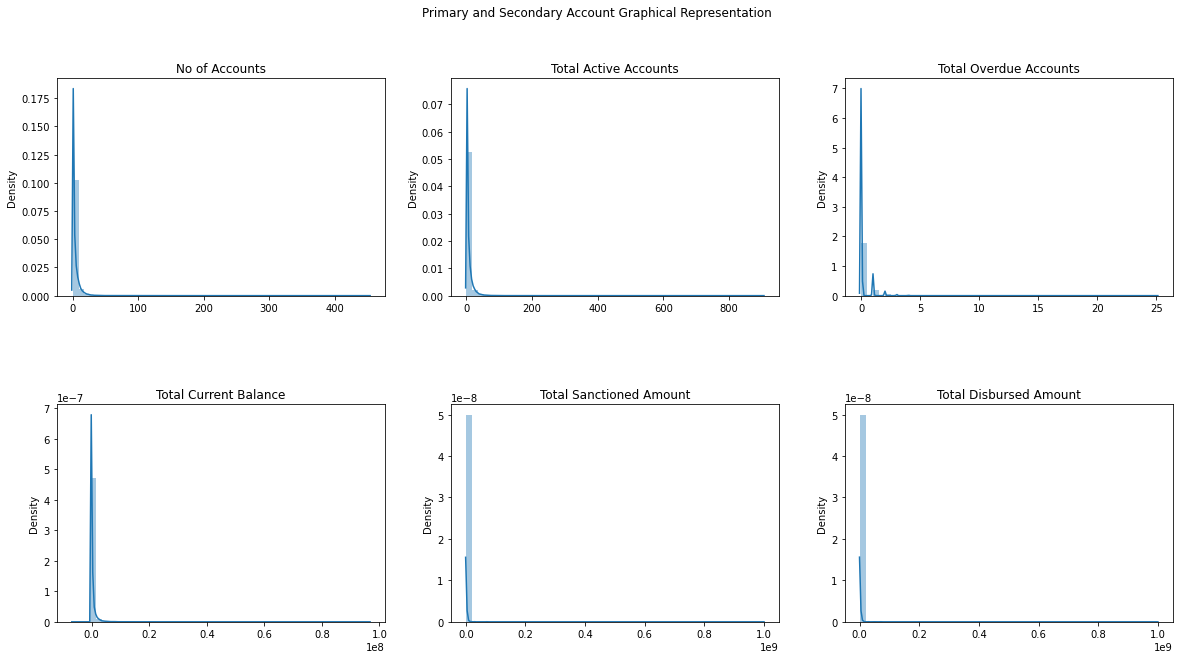

In [84]:
# Plotting the Graph

n=['No of Accounts','Total Active Accounts','Total Overdue Accounts','Total Current Balance','Total Sanctioned Amount','Total Disbursed Amount']
data=df[n]
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Primary and Secondary Account Graphical Representation')

for ax, feature, name in zip(axes.flatten(), data.values.T, data.columns):
    sns.distplot(feature, ax=ax)
    ax.set(title=str(name))
plt.show()

Maximum number of customers are applying for loan for the first time, which explains why all the above columns have so many zero values. Also, there are many notable outliers, which makes the problem more complicated.

As we can see that Toatl Santioned Amount and Total Disbursed Amount for both Primary and Secondary accounts having so many zero values and from the heatmap earlier we saw that both having relationship of 1. That means both are having similar stats in terms of distribution of defaulter and non defaulter.

No of Enquirires

In [85]:
# Getting the percenatge data for No of Enquiries

counts = df['No of Inquiries'].value_counts()
percent = df['No of Inquiries'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

,counts,percent_of_data
0,201961,86.621289
1,22285,9.558060
2,5409,2.319926
3,1767,0.757868
4,760,0.325965
5,343,0.147113
6,239,0.102507
7,135,0.057902
8,105,0.045035
9,44,0.018872


Most of the customers have not made any enquiries regarding loans

In [86]:
# Getting the non default vs default percentage for No of Enquiries

no_inquiries = pd.crosstab(index=df['No of Inquiries'], columns=df['Loan Default'])
no_inquiries['pct_default'] = (no_inquiries[1]/no_inquiries.sum(axis=1))*100
no_inquiries

Loan Default,0,1,pct_default
No of Inquiries,,,
0,159404,42557,21.071890
1,16844,5441,24.415526
2,3918,1491,27.565169
3,1250,517,29.258630
4,526,234,30.789474
5,212,131,38.192420
6,148,91,38.075314
7,80,55,40.740741
8,61,44,41.904762


Here, except for few cases, as the number of enquires increase, there is an increase in the pct of default.

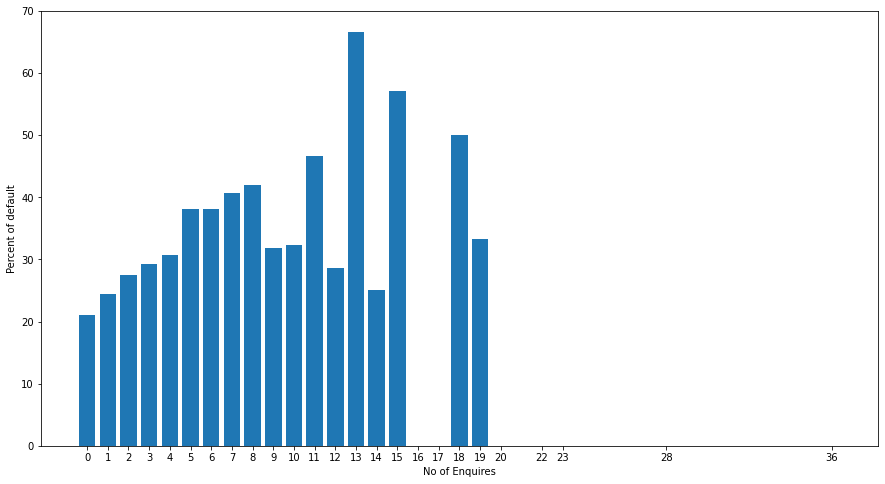

In [87]:
# Plottin th Graph

plt.figure(figsize=(15,8))
plt.bar(no_inquiries.index,no_inquiries['pct_default'])
plt.xticks(no_inquiries.index)
plt.xlabel('No of Enquires')
plt.ylabel('Percent of default')
plt.show()

Credit History

In [88]:
df.columns

Index(['ltv', 'Age', 'Credit Risk', 'Employment Type', 'AVERAGE ACCT AGE',
       'CREDIT HISTORY LENGTH', 'No of Accounts', 'Total Inactive accounts',
       'Total Overdue Accounts', 'Total Current Balance',
       'Total Sanctioned Amount', 'Total Disbursed Amount',
       'Total Installment', 'Asset Cost', 'Branch ID', 'State ID',
       'Supplier ID', 'Manufacturer ID', 'Aadhar', 'Pan', 'Voter', 'Driving',
       'Passport', 'Credit Score', 'New Accnt in last 6 months',
       'Loans defaulted in last 6 months', 'No of Inquiries', 'Loan Default',
       'Total Active Accounts'],
      dtype='object')

In [89]:
# Statistical description of CREDIT HISTORY LENGTH

df['CREDIT HISTORY LENGTH'].describe()

count    233154.000000
mean         16.252404
std          28.581255
min           0.000000
25%           0.000000
50%           0.000000
75%          24.000000
max         468.000000
Name: CREDIT HISTORY LENGTH, dtype: float64

In [90]:
# Getting the data of defaulter and non defaulter 

credit_non_default = df[df['Loan Default'] == 0]['CREDIT HISTORY LENGTH']
credit_default = df[df['Loan Default'] == 1]['CREDIT HISTORY LENGTH']

In [91]:
pd.DataFrame([credit_non_default.describe(), credit_default.describe()], index=['non_defaulters','defaulters'])

,count,mean,std,min,25%,50%,75%,max
non_defaulters,182543.0,16.886377,29.342245,0.0,0.0,0.0,24.0,449.0
defaulters,50611.0,13.965798,25.519395,0.0,0.0,0.0,21.0,468.0


The mean and std is slightly higher for non defaulters

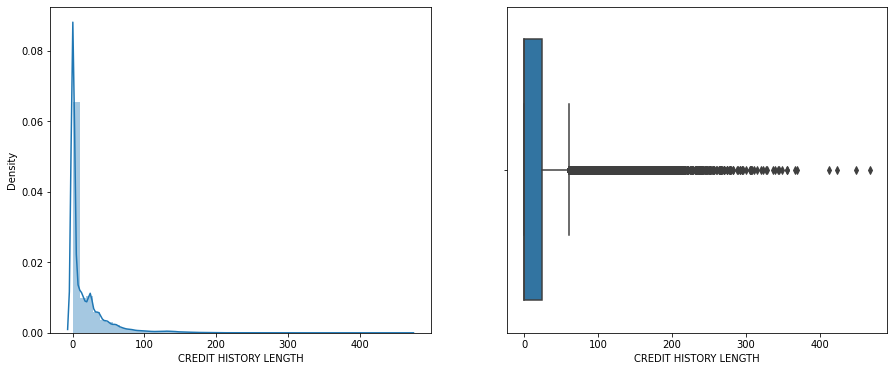

In [92]:
# Plotting the Graph

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.distplot(df['CREDIT HISTORY LENGTH'])

plt.subplot(1,2,2)
sns.boxplot(df['CREDIT HISTORY LENGTH'])

plt.show()

Highly right skewed


New Account in last 6 Months

In [93]:
# Getting the percentage data for New Accnt in last 6 months

counts = df['New Accnt in last 6 months'].value_counts()
percent = df['New Accnt in last 6 months'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

,counts,percent_of_data
0,181494,77.842971
1,32099,13.767295
2,11015,4.724345
3,4458,1.912041
4,1957,0.839359
5,964,0.413461
6,480,0.205873
7,302,0.129528
8,147,0.063048
9,79,0.033883


Most of them have not opened any new account in the last 6 months

Loans defaulted in last 6 months

In [94]:
# Getting the percentage data for Loans defaulted in last 6 months

counts = df['Loans defaulted in last 6 months'].value_counts()
percent = df['Loans defaulted in last 6 months'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

,counts,percent_of_data
0,214959,92.196145
1,14941,6.408211
2,2470,1.059386
3,537,0.230320
4,138,0.059188
5,58,0.024876
6,20,0.008578
7,13,0.005576
8,7,0.003002
11,3,0.001287


We can see that 92% of customers have not defaulted loans in last six months. 8% of customers have deafulted loans for >= 1 time

Checking and Handling Outliers 

In [95]:
df.columns

Index(['ltv', 'Age', 'Credit Risk', 'Employment Type', 'AVERAGE ACCT AGE',
       'CREDIT HISTORY LENGTH', 'No of Accounts', 'Total Inactive accounts',
       'Total Overdue Accounts', 'Total Current Balance',
       'Total Sanctioned Amount', 'Total Disbursed Amount',
       'Total Installment', 'Asset Cost', 'Branch ID', 'State ID',
       'Supplier ID', 'Manufacturer ID', 'Aadhar', 'Pan', 'Voter', 'Driving',
       'Passport', 'Credit Score', 'New Accnt in last 6 months',
       'Loans defaulted in last 6 months', 'No of Inquiries', 'Loan Default',
       'Total Active Accounts'],
      dtype='object')

In [96]:
# Creating the dataframe to plot graphs to check outliers

df4 = df[['Total Disbursed Amount', 'ltv',
       'CREDIT HISTORY LENGTH',
       'New Accnt in last 6 months', 'No of Inquiries',
       'Age', 'Total Active Accounts',
       'Total Overdue Accounts', 'Total Sanctioned Amount', 'Total Installment','Total Current Balance']]

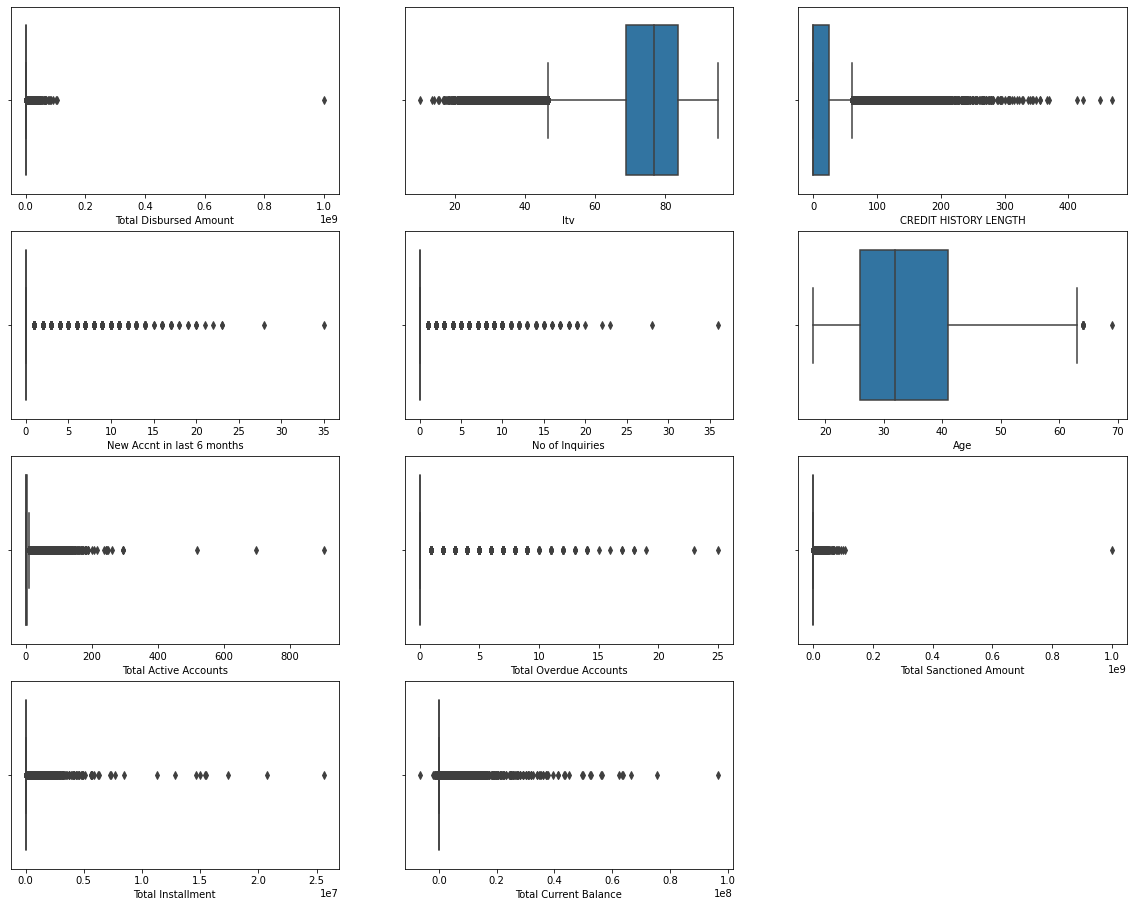

In [97]:
# Plotting the Graph

plt.figure(figsize=(20,20))
x = 1
for column in df4.columns:
    if x<=11:
        plt.subplot(5,3,x)
        sns.boxplot(df[column])
    x+=1
plt.show()

From the above graphs, we can see that there are lot of outliers for each column.

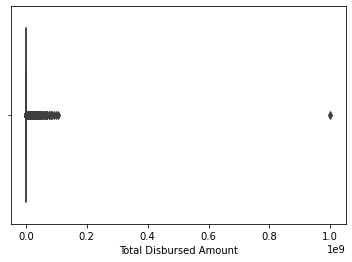

In [98]:
# Box plot of Total Disbursed Amount

sns.boxplot(df['Total Disbursed Amount'])
plt.show()

In [99]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers for Total Disbursed Amount

for i in range(0,100,10):
    var = df['Total Disbursed Amount'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 7961
70 percentile value is 42700
80 percentile value is 110000
90 percentile value is 463000
100 percentile value is  1000000000


In [100]:
#looking further from the 99th percecntile

for i in range(90,100):
    var = df['Total Disbursed Amount'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 463000
91 percentile value is 526371
92 percentile value is 614355
93 percentile value is 728500
94 percentile value is 885500
95 percentile value is 1065080
96 percentile value is 1342990
97 percentile value is 1712567
98 percentile value is 2311104
99 percentile value is 3540635
100 percentile value is  1000000000


In [101]:
df = df[df['Total Disbursed Amount']<max(df['Total Disbursed Amount'])]

In [102]:
# Removing outliers from different columns

df = df[df['New Accnt in last 6 months']<25]
df = df[df['CREDIT HISTORY LENGTH']<400]
df = df[df['No of Inquiries']<25]
df = df[df['Total Active Accounts']<400]
df = df[df['Total Sanctioned Amount']<max(df['Total Sanctioned Amount'])]

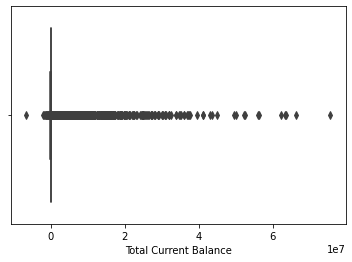

In [103]:
# Box plot for Total Current Balance

sns.boxplot(df['Total Current Balance'])
plt.show()

In [104]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers for Total Current Balance

for i in range(0,100,10):
    var = df['Total Current Balance'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is -6678296
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 0
70 percentile value is 18150
80 percentile value is 66474
90 percentile value is 317224
100 percentile value is  75603400


In [105]:
#looking further from the 99th percecntile

for i in range(90,100):
    var = df['Total Current Balance'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 317224
91 percentile value is 379678
92 percentile value is 452303
93 percentile value is 541622
94 percentile value is 667083
95 percentile value is 832946
96 percentile value is 1053933
97 percentile value is 1395256
98 percentile value is 1914733
99 percentile value is 2993088
100 percentile value is  75603400


In [106]:
# Removing outlier by setting a range in the column

df = df[(df['Total Current Balance']>-6678296) & (df['Total Current Balance']<75603400)]

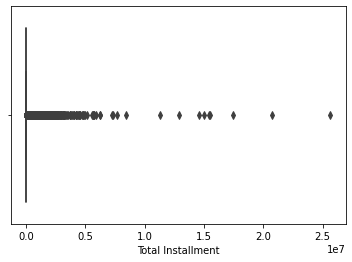

In [107]:
# Box plot for Total Installment

sns.boxplot(df['Total Installment'])
plt.show()

In [108]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers for Total Installment

for i in range(0,100,10):
    var = df['Total Installment'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 0
70 percentile value is 1243
80 percentile value is 3500
90 percentile value is 11880
100 percentile value is  25642806


In [109]:
#looking further from the 99th percecntile

for i in range(90,100):
    var = df['Total Installment'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 11880
91 percentile value is 13548
92 percentile value is 15652
93 percentile value is 18288
94 percentile value is 21914
95 percentile value is 27301
96 percentile value is 36553
97 percentile value is 57053
98 percentile value is 109750
99 percentile value is 263915
100 percentile value is  25642806


In [110]:
# Removing outliers

df = df[df['Total Installment']<10000000]

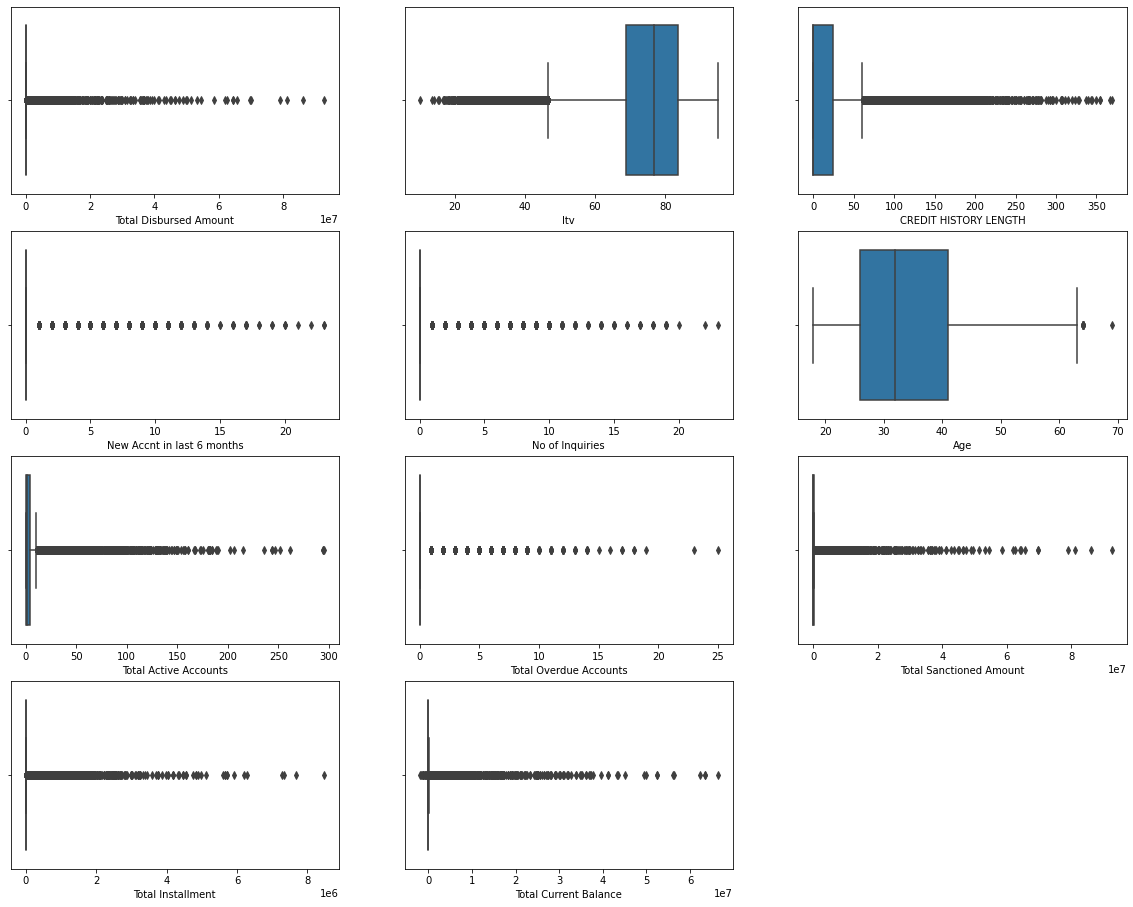

In [111]:
# Checking the distributions again

plt.figure(figsize=(20,20))
x = 1
for column in df4.columns:
    if x<=13:
        plt.subplot(5,3,x)
        sns.boxplot(df[column])
    x+=1
plt.show()

Still we can see so many outlier.

In [112]:
# Removing few more outliers/extreme values

df = df[df['Total Disbursed Amount']<70000000]
df = df[df['Total Current Balance']<40000000]
df = df[df['Total Sanctioned Amount']<70000000]
df = df[df['Total Installment']<=5000000]

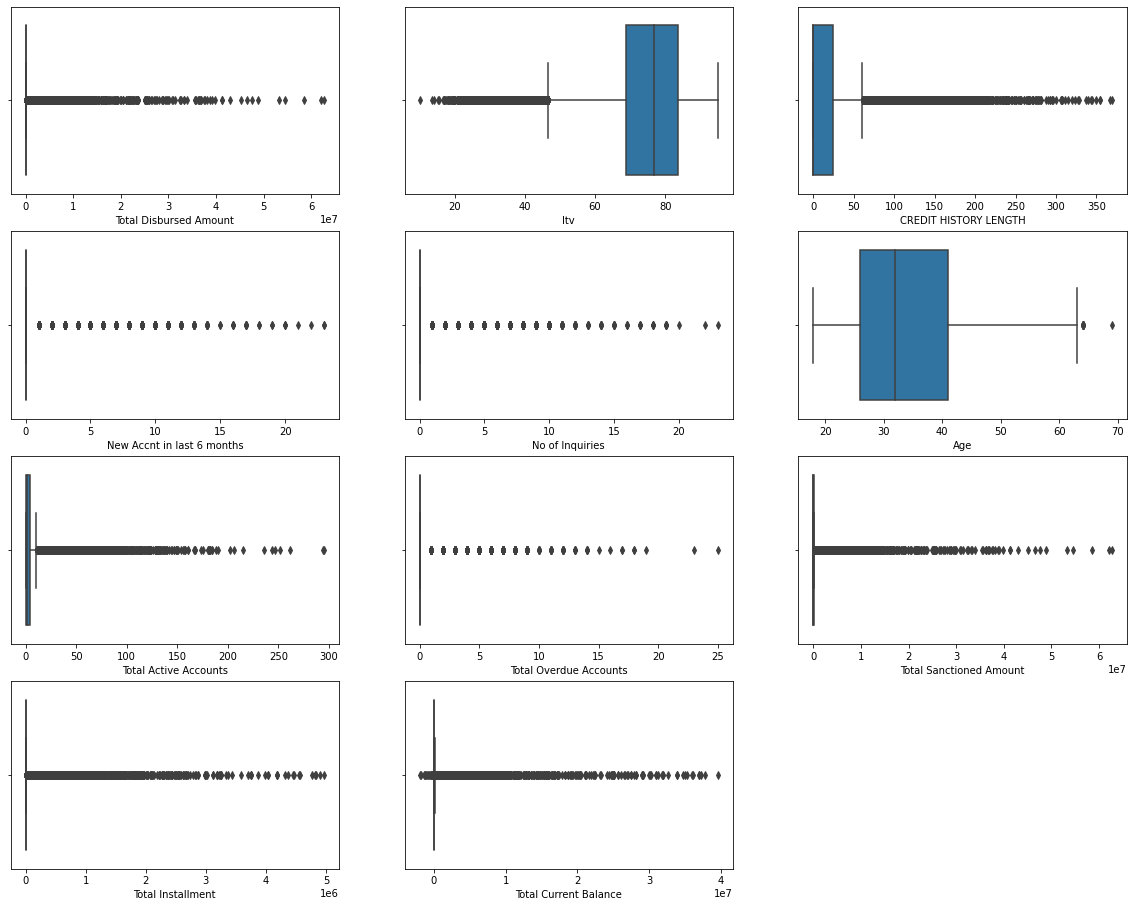

In [113]:
# Checking the distribution once again

plt.figure(figsize=(20,20))
x = 1
for column in df4.columns:
    if x<=11:
        plt.subplot(5,3,x)
        sns.boxplot(df[column])
    x+=1
plt.show()

Now we can see that most oof extreme outliers are removed.

In [114]:
df.columns

Index(['ltv', 'Age', 'Credit Risk', 'Employment Type', 'AVERAGE ACCT AGE',
       'CREDIT HISTORY LENGTH', 'No of Accounts', 'Total Inactive accounts',
       'Total Overdue Accounts', 'Total Current Balance',
       'Total Sanctioned Amount', 'Total Disbursed Amount',
       'Total Installment', 'Asset Cost', 'Branch ID', 'State ID',
       'Supplier ID', 'Manufacturer ID', 'Aadhar', 'Pan', 'Voter', 'Driving',
       'Passport', 'Credit Score', 'New Accnt in last 6 months',
       'Loans defaulted in last 6 months', 'No of Inquiries', 'Loan Default',
       'Total Active Accounts'],
      dtype='object')

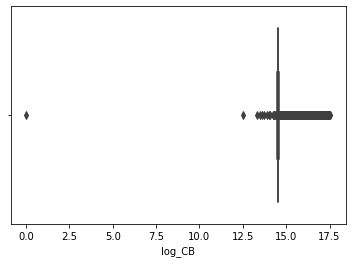

In [115]:
# Transforming the features Total Current Balance, Total Sanctioned Amount and Total Installment

## For Total Current Balance

df['log_CB'] = np.log(df['Total Current Balance']+1-min(df['Total Current Balance']))
sns.boxplot(df['log_CB'])
plt.show()

In [116]:
df['log_CB'].describe()

count    233103.000000
mean         14.571322
std           0.179804
min           0.000000
25%          14.515495
50%          14.515495
75%          14.533839
max          17.544459
Name: log_CB, dtype: float64

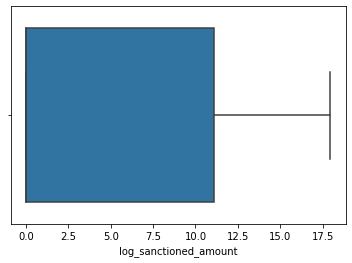

In [117]:
# For Sanctioned Amount

df['log_sanctioned_amount'] = np.log(df['Total Sanctioned Amount']+1)
sns.boxplot(df['log_sanctioned_amount'])
plt.show()

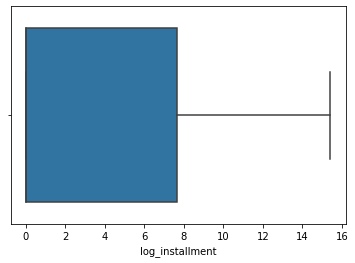

In [118]:
#Total Installment

df['log_installment'] = np.log(df['Total Installment']+1)
sns.boxplot(df['log_installment'])
plt.show()

In [119]:
# Droping Total Current Balance, Total Sanctioned Amount, Total Installment

df.drop(['Total Current Balance','Total Sanctioned Amount','Total Installment'],axis=1,inplace=True)

In [120]:
df.columns

Index(['ltv', 'Age', 'Credit Risk', 'Employment Type', 'AVERAGE ACCT AGE',
       'CREDIT HISTORY LENGTH', 'No of Accounts', 'Total Inactive accounts',
       'Total Overdue Accounts', 'Total Disbursed Amount', 'Asset Cost',
       'Branch ID', 'State ID', 'Supplier ID', 'Manufacturer ID', 'Aadhar',
       'Pan', 'Voter', 'Driving', 'Passport', 'Credit Score',
       'New Accnt in last 6 months', 'Loans defaulted in last 6 months',
       'No of Inquiries', 'Loan Default', 'Total Active Accounts', 'log_CB',
       'log_sanctioned_amount', 'log_installment'],
      dtype='object')

In [121]:
df.shape

(233103, 29)

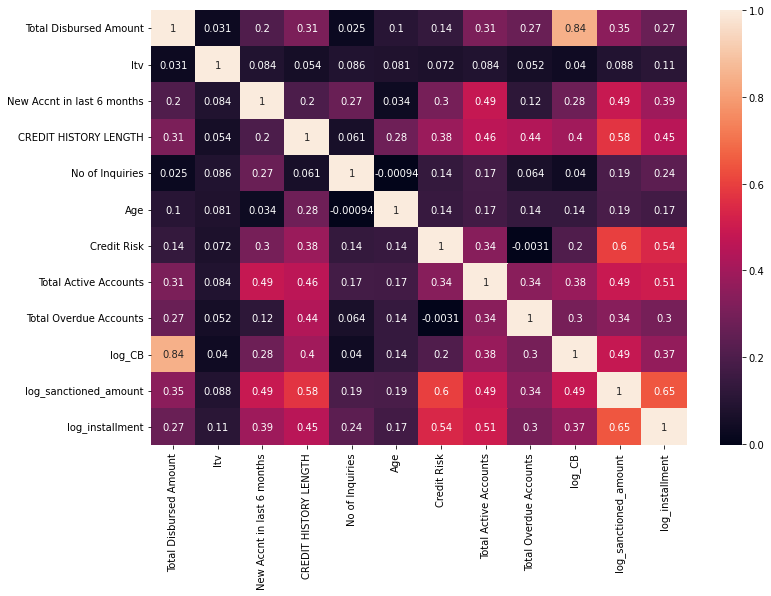

In [122]:
# Plotting correlated Heat Map

plt.figure(figsize=(12,8))
sns.heatmap(df[['Total Disbursed Amount', 'ltv','New Accnt in last 6 months','CREDIT HISTORY LENGTH','No of Inquiries',
               'Age','Credit Risk','Total Active Accounts', 'Total Overdue Accounts', 'log_CB','log_sanctioned_amount', 
                'log_installment']].corr(),annot=True)
plt.show()

There is a correlation of .84 between Total Disbursed Amount and log_CB. Hence removing the log_CB feature after comparing the feature importances

In [123]:
# Droping log_CB

df.drop('log_CB',axis=1,inplace=True)

In [124]:
df.shape

(233103, 28)

In [125]:
df.columns

Index(['ltv', 'Age', 'Credit Risk', 'Employment Type', 'AVERAGE ACCT AGE',
       'CREDIT HISTORY LENGTH', 'No of Accounts', 'Total Inactive accounts',
       'Total Overdue Accounts', 'Total Disbursed Amount', 'Asset Cost',
       'Branch ID', 'State ID', 'Supplier ID', 'Manufacturer ID', 'Aadhar',
       'Pan', 'Voter', 'Driving', 'Passport', 'Credit Score',
       'New Accnt in last 6 months', 'Loans defaulted in last 6 months',
       'No of Inquiries', 'Loan Default', 'Total Active Accounts',
       'log_sanctioned_amount', 'log_installment'],
      dtype='object')

Modelling

Logistic Regression


In [126]:
# Diving data into dependent and independent variable

y = df['Loan Default'] # Dependent variable data
X = df.drop('Loan Default',axis=1) # Independent variables data

In [127]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

Train Test Split

In [128]:
# Splitting the data into train, test and validation
# Used 70-30 split for train and test data
# Then splitted tarin into 65-35 for train and validation

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=120)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.35,random_state=120)

In [129]:
X_train.shape

(106061, 27)

In [130]:
y_train

9475      1
125063    0
61805     0
197406    0
22854     0
         ..
75667     1
114411    0
116984    0
116784    0
17849     0
Name: Loan Default, Length: 106061, dtype: int64

In [131]:
X_test.shape

(69931, 27)

In [132]:
y_test

139631    0
213115    0
224451    1
74172     0
196093    1
         ..
61228     0
102382    0
139459    0
8541      1
192482    1
Name: Loan Default, Length: 69931, dtype: int64

In [133]:
X_val.shape

(57111, 27)

In [134]:
y_val

103929    0
80331     0
93804     1
16043     0
17936     1
         ..
91174     0
179480    0
196919    0
77937     1
223368    0
Name: Loan Default, Length: 57111, dtype: int64

In [135]:
# Creating Logistic Regression Model

from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

y_test_pred = lg_model.predict(X_test)
y_val_pred = lg_model.predict(X_val)

In [136]:
y_test_prob = lg_model.predict_proba(X_test)
y_val_prob = lg_model.predict_proba(X_val)

AUC Score for test and validation


In [137]:
from sklearn.metrics import confusion_matrix,roc_auc_score,log_loss,roc_curve,accuracy_score

In [138]:
print('The train AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_val,y_val_prob[:,1]))

The train AUC score is: 0.6371499057245624
The test AUC score is: 0.6282720690489645


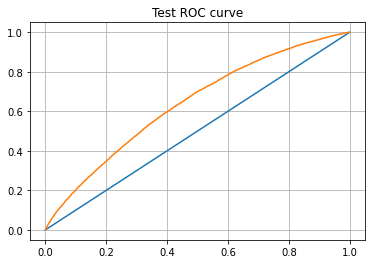

In [139]:
# Plotting the AUC curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [140]:
#Getting Confusion Matrix

confusion_matrix(y_test,y_test_pred)

array([[54674,    84],
       [15096,    77]])

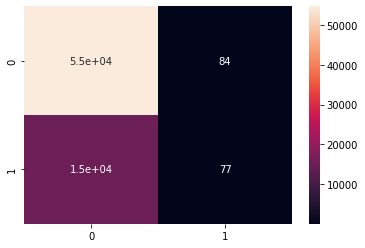

In [141]:
# Plotting Confussion Matrix

sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.show()

In [142]:
# getting Classification Report

from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54758
           1       0.48      0.01      0.01     15173

    accuracy                           0.78     69931
   macro avg       0.63      0.50      0.44     69931
weighted avg       0.72      0.78      0.69     69931



In [143]:
# For 1s the f1 score is really low

# Before computing the binary log loss, we need to perform caliberation

from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(lg_model, cv=3, method='isotonic')
model_isotonic.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression(), cv=3,
                       method='isotonic')

In [144]:
isotonic_predict_prob_test = model_isotonic.predict_proba(X_test)

In [145]:
log_loss(y_test,isotonic_predict_prob_test)

0.5033662707531528

In [146]:
# applying SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)
X_train_sm.shape, y_train_sm.shape

((166006, 27), (166006,))

In [147]:
# Creating model on SMOTE data

lg_model1 = LogisticRegression(solver='liblinear',random_state=42)
lg_model1.fit(X_train_sm,y_train_sm)

LogisticRegression(random_state=42, solver='liblinear')

In [148]:
y_train_pred = lg_model1.predict(X_train_sm)
y_test_pred = lg_model1.predict(X_test)
y_train_prob = lg_model1.predict_proba(X_train_sm)
y_test_prob = lg_model1.predict_proba(X_test)

In [149]:
# Getting AUC score

print('The train AUC score is:',roc_auc_score(y_train_sm,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.6430674849912712
The test AUC score is: 0.6367981678476505


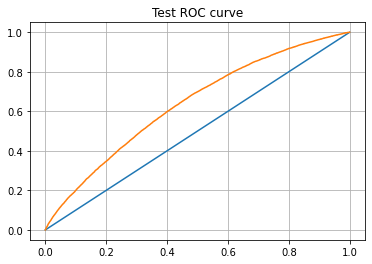

In [150]:
# Plotting the AUC curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [151]:
# Getting Confusion Matrix

confusion_matrix(y_test,y_test_pred)

array([[29990, 24768],
       [ 5272,  9901]])

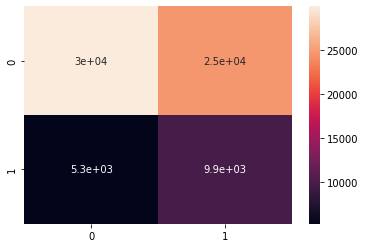

In [152]:
# Plotting Confusion Matrix

sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.show()

In [153]:
# Getting Classification Report

from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.85      0.55      0.67     54758
           1       0.29      0.65      0.40     15173

    accuracy                           0.57     69931
   macro avg       0.57      0.60      0.53     69931
weighted avg       0.73      0.57      0.61     69931



From Classification Report, we can say that f1 score for 1s has increased but the accuracy of the model is 57% which is average for a prediction model.

In [154]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(lg_model1, cv=3, method='isotonic')
model_isotonic.fit(X_train_sm,y_train_sm)

CalibratedClassifierCV(base_estimator=LogisticRegression(random_state=42,
                                                         solver='liblinear'),
                       cv=3, method='isotonic')

In [155]:
isotonic_predict_prob_test = model_isotonic.predict_proba(X_test)

In [156]:
log_loss(y_test,isotonic_predict_prob_test)

0.6632835277020528

As we can see that the log loss value for the model is .66 and which is not that good value for binary log loss as we expect low value of log loss for good prediction model.

So we can conclude that out model after applying SMOTE on the data is providing better accuracy in prediction as from confusion matrix in the above we can see that we have better f1 score than the first matrix before applying SMOTE but still as a prediction model we prefer better accuracy than what we are getting from our model. For that we need better balanced data to create a better model.

